<a href="https://colab.research.google.com/github/ms624atyale/NLP/blob/main/11_TextScraping_Converting_Saving_Converting_LD_FRE_SentAnalysis_SemanticSimilarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color = 'red'> 🐹 👀 🐾 **Text/Content/Web Scraping without HTML tags**

## **API-based Data Collection**

### <font color = 'blue'> **cf., Crawling (a.k.a. HTML Scraping) or Text Mining**

In [ ]:
pip install requests

##🐣 **Defining a function for text scraping**

In [ ]:
import requests #Import the requests library to make HTTP requests.

def get_wikipedia_page(title):                   #Define a function
    URL = "https://en.wikipedia.org/w/api.php"  #Set the API(application program interface) endpoint URL: https://en.wikipedia.org/w/api.php.

    PARAMS = {                                  #Build PARAMS (query parameters) for the API request:
        "action": "query",                      #ask the API to run a query
        "format": "json",                       #request a JSON response
        "prop": "extracts",                     #ask for the page extract (clean text summary)
        "titles": title,                        #specify which page to fetch (by title)
        "explaintext": 1                        #return plain text (no HTML/markup)

    }

    # IMPORTANT: Error messages for Bots pretending to be browsers. Do not pretend you are browsers.
    #headers = {
    #    "User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 " #header to mimic a normal browser request (helps avoid blocks)
    #                  "(KHTML, like Gecko) Chrome/123.0 Safari/537.36"
    #}

    headers = {
        "User-Agent": "MyNLPProject (education use)"
        }
    response = requests.get(URL, params=PARAMS, headers=headers)           #Send a GET request to the API with requests

    if response.status_code != 200:                                        #Check the HTTP status code: If not 200 OK, print an error message and return None.
        print("HTTP error:", response.status_code)
        return None

    try:
        data = response.json()                                            #Try to parse the response body as JSON with response.json():
    except:
        print("JSON decode error")                                        #If JSON decoding fails, print a debug message showing the start of the raw response and return None.
        print("Raw response:", response.text[:500])
        return None

    pages = data.get("query", {}).get("pages", {})                      #Navigate the JSON structure to the page data: data["query"]["pages"] (a dictionary keyed by numeric page id).
    page = next(iter(pages.values()))                                   #Extract the single page object with next(iter(pages.values())) (handles the unknown page id).
    return page.get("extract", "")                                      #Return the page’s plain-text extract via page.get("extract", "").
                                                                        #If the page exists, this is the article text; if not, it returns an empty string (or None earlier if errors occurred).

##🐹🐾 **Install NLTK and Download necessary models**

In [ ]:
!pip install nltk
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

###🐹🐾 **1️⃣ Pandas Library**

In [ ]:
!pip install pandas
!pip install lexical_diversity
import pandas as pd #Import Pandas Package
import lexical_diversity as ld

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 2.8 MB/s eta 0:00:00


# 🅰️ **Group1**

## ✅ **Text scraping for Group1**

In [ ]:
titles = [
    "K-pop",
    "Korean Wave",
    "KPop Demon Hunters",
    "BTS"
]

corpus = {}

for t in titles:
    txt = get_wikipedia_page(t)
    if txt:
        corpus[t] = txt
    else:
        print("Failed:", t)

# Show first 200 chars for each
for title, text in corpus.items():
    print("\n====", title, "====")
    print(text[:200])


==== K-pop ====
K-pop (Korean: 케이팝; RR: Keipap; an abbreviation of "Korean popular music") is a form of popular music originating in South Korea.The music genre that the term is used to refer to colloquially emerged 

==== Korean Wave ====
The Korean Wave, or hallyu (Korean: 한류; ), refers to the rapid global rise in South Korean popular culture since the 1990s. It is led by the spread of K-pop, K-dramas, and films, with key successes in

==== KPop Demon Hunters ====
KPop Demon Hunters is a 2025 American animated musical urban fantasy film co-written and directed by Maggie Kang and Chris Appelhans. It was produced by Sony Pictures Animation for Netflix and animate

==== BTS ====
BTS (Korean: 방탄소년단; RR: Bangtan Sonyeondan; lit. Bulletproof Boy Scouts), also known as the Bangtan Boys, is a South Korean boy band formed in 2010. The band consists of Jin, Suga, J-Hope, RM, Jimin, 


##🐹 🐾 📌 **Use this!!!**📌
###⭕ <font color = 'green'> **Script for [Group1] — Create one Txt file with records separated by @@@@@**

In [ ]:
output = []

for title in titles:
    txt = get_wikipedia_page(title)
    if not txt:
        txt = ""   # store empty if missing
    block = f"@@@@@\nTITLE: {title}\n{txt}\n"
    output.append(block)

final = "\n".join(output)

with open("wiki_corpus_delimited_group1.txt", "w", encoding="utf-8") as f:
    f.write(final)

print("Saved: wiki_corpus_delimited_group1.txt")

Saved: wiki_corpus_delimited_group1.txt


####✅ **Alternative Script for [Group1] — Create one CSV with two columns (title + text)**

In [ ]:
import csv

rows = []

for title in titles:
    txt = get_wikipedia_page(title)
    rows.append([title, txt])

with open("wiki_corpus_delimited_group1.csv", "w", encoding="utf-8", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["title", "text"])
    writer.writerows(rows)

print("Saved: wiki_corpus_delimited_group1.csv")

Saved: wiki_corpus_delimited_group1.csv


# 🐹🐾 **Read the txt file**
###🐣 **Open and read the text file for Group1**

In [ ]:
# ▶️ Step 1: You need to modify this codeline 🍎🍎🍎🍎🍎
file = open("/content/wiki_corpus_delimited_group1.txt", 'rt')

txt = file.read()
print(txt)
file.close() #Using this close()function, you are no longer using your text file of the current workingdirectory with open()function.

@@@@@
TITLE: K-pop
K-pop (Korean: 케이팝; RR: Keipap; an abbreviation of "Korean popular music") is a form of popular music originating in South Korea.The music genre that the term is used to refer to colloquially emerged in the 1990s as a form of youth subculture, with Korean musicians influenced by Western dance music, hip-hop, R&B and rock. Today, K-pop commonly refers to the musical output of teen idol acts, chiefly girl groups and boy bands, who emphasize visual appeal and performance. As a pop genre, K-pop is characterized by its melodic quality and cultural hybridity.
K-pop can trace its origins to "rap dance", a fusion of hip-hop, techno and rock popularized by the group Seo Taiji and Boys, whose experimentation helped to modernize South Korea's contemporary music scene in the early 1990s. Their popularity with teenagers led the music industry to focus on this demographic. Lee Soo-man of SM Entertainment, who developed the Korean idol system in the late 1990s, created H.O.T. and S

##🐹🐾 ❄️ **Basic Cleaning**
###**📍Apply a series of functions for replacement in Group1**

In [ ]:
import re

# Step 1: Read file to change path as needed 🍎🍎🍎🍎🍎🍎
with open("/content/wiki_corpus_delimited_group1.txt", 'rt') as fl:
    raw_text = fl.read()

# STEP 2: Clean the text
clean_text = (
    raw_text
    .replace("\n", " ")
    .replace("“", "")
    .replace("”", "")
    .replace("\"", "")
    .replace("/", "")
    .replace("_", "")
    .replace("===", "")
    .replace("==", "")
    .replace("=", "")
    .replace("*", "")
    .replace("?", "")
    .replace("!", "")
    .replace("--", " ")
    .replace("(", "")
    .replace(")", "")
)

# STEP 3: Save the cleaned content to a NEW file as you designate the output path 🍏🍏🍏🍏🍏🍏
output_path = "/content/wiki_corpus_delimited_group1_CLEANED.txt"
with open(output_path, 'w') as cf:
    cf.write(clean_text) #Get content named 'clean_text' to the new empty file

# Optional: Print to verify
print("✅ Cleaned text saved to:", output_path)

✅ Cleaned text saved to: /content/wiki_corpus_delimited_group1_CLEANED.txt


###🐹🐣🐣🐣**Download and edit two txt files so that it has headers delimited by @, and upload it under [Wikipedia] Foldr of your github account!**

##✅ ✅**Text scraping for Group2**

In [ ]:
titles = [
    "2024 Nobel Prize in Literature",
    "Han Kang",
    "Bong Joon Ho",
    "Pachinko"
]

corpus = {}

for t in titles:
    txt = get_wikipedia_page(t)
    if txt:
        corpus[t] = txt
    else:
        print("Failed:", t)

# Show first 200 chars for each
for title, text in corpus.items():
    print("\n====", title, "====")
    print(text[:200])


==== 2024 Nobel Prize in Literature ====
The 2024 Nobel Prize in Literature was awarded to the South Korean author Han Kang (born 1970) "for her intense poetic prose that confronts historical traumas and exposes the fragility of human life".

==== Han Kang ====
Han Kang (Korean: 한강; born 27 November 1970) is a South Korean writer. From 2007 to 2018, she taught creative writing at the Seoul Institute of the Arts. Han rose to international prominence for her n

==== Bong Joon Ho ====
Bong Joon Ho (Korean: 봉준호; pronounced [poːŋ tɕuːnho]; born September 14, 1969) is a South Korean filmmaker. His work is characterized by emphasis on social and class themes, genre-mixing, dark comedy,

==== Pachinko ====
Pachinko (Japanese: パチンコ; pronounced [patɕiŋko]) is a mechanical game originating in Japan that is used as an arcade game and, much more frequently, for gambling. Pachinko fills a niche in Japanese ga


##⭕⭕ <font color = 'blue'> **Script for [Group2] — Create one Txt file with records separated by @@@@@**

In [ ]:
output = []

for title in titles:
    txt = get_wikipedia_page(title)
    if not txt:
        txt = ""   # store empty if missing
    block = f"@@@@@\nTITLE: {title}\n{txt}\n"
    output.append(block)

final = "\n".join(output)

with open("wiki_corpus_delimited_group2.txt", "w", encoding="utf-8") as f:
    f.write(final)

print("Saved: wiki_corpus_delimited_group2.txt")

Saved: wiki_corpus_delimited_group2.txt


###🐣🐣 **Open and read the text file for Group2**

In [ ]:
# ▶️ Step 1: You need to modify this codeline 🍎🍎🍎🍎🍎
file = open("/content/wiki_corpus_delimited_group2.txt", 'rt')

txt = file.read()
print(txt)
file.close() #Using this close()function, you are no longer using your text file of the current workingdirectory with open()function.

@@@@@
TITLE: 2024 Nobel Prize in Literature
The 2024 Nobel Prize in Literature was awarded to the South Korean author Han Kang (born 1970) "for her intense poetic prose that confronts historical traumas and exposes the fragility of human life". It was announced by the Swedish Academy in Stockholm, Sweden, on 10 October 2024 and was awarded on 10 December 2024. 
She is the first South Korean and first Asian woman to win the Nobel Prize in Literature, making her the 18th woman to win the Nobel Prize in Literature and the tenth Asian laureate in that Nobel Prize category.


== Laureate ==

Han Kang grew up with a literary background in Seoul, her father, Han Seung-won, being a reputed novelist. Alongside her passion for writing, she spends time exploring arts and music, which is reflected throughout her literary production. She started her career in 1993 with the publication of her poems in the literary magazine Literature and Society, and had her debut prose publication in 1995 with the 

##**📍📍Apply a series of functions for replacement in Group2**

In [ ]:
import re

# Step 1: Read file to change path as needed 🍎🍎🍎🍎🍎🍎
with open("/content/wiki_corpus_delimited_group2.txt", 'rt') as fl:
    raw_text = fl.read()

# STEP 2: Clean the text
clean_text = (
    raw_text
    .replace("\n", " ")
    .replace("“", "")
    .replace("”", "")
    .replace("\"", "")
    .replace("/", "")
    .replace("_", "")
    .replace("===", "")
    .replace("==", "")
    .replace("=", "")
    .replace("*", "")
    .replace("?", "")
    .replace("!", "")
    .replace("--", " ")
    .replace("(", "")
    .replace(")", "")
)

# STEP 3: Save the cleaned content to a NEW file as you designate the output path 🍏🍏🍏🍏🍏🍏
output_path = "/content/wiki_corpus_delimited_group2_CLEANED.txt"
with open(output_path, 'w') as cf:
    cf.write(clean_text) #Get content named 'clean_text' to the new empty file

# Optional: Print to verify
print("✅ Cleaned text saved to:", output_path)

✅ Cleaned text saved to: /content/wiki_corpus_delimited_group2_CLEANED.txt


#🐹🐣🐣🐣 **IMPORTANT**

##**<font color='red'> Further Manual editing is required!**

**1. Download and edit two CLEANED.txt files so that it has headers delimited by @.**

- <font color = 'green'> Type in "Text"@"Title"@"Group
- Strings are case sensitive.
- Since you have used multiple @@@@@ as a symbol of delimiting each wikipedia articles, use Find function and locate a next article. It is convenient.
-  Save the file as ....CLEANED_Edit.txt

**2. Upload it under [Wikipedia] Foldr of your github account!**

###🐹🐣**Clone your github repository of your interest**

In [ ]:
!git clone https://github.com/ms624atyale/NLP

Cloning into 'NLP'...
remote: Enumerating objects: 447, done.
remote: Counting objects: 100% (166/166), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 447 (delta 128), reused 68 (delta 68), pack-reused 281 (from 1)
Receiving objects: 100% (447/447), 9.27 MiB | 12.75 MiB/s, done.
Resolving deltas: 100% (236/236), done.


###🍄🍄 **If you need to remove the repository you've just cloned, run the following code cell if necessary.**

- <font color = 'red'> **_import shutil_**

- <font color = 'red'> **_shutil.rmtree('/CurrentDirectoryPath')_**

In [ ]:
#@markdown <font color = 'purple'> Run this cell if needed...
import shutil
shutil.rmtree('/content/NLP')

In [ ]:
#Reset your current directory after you remove your directory manually (e.g., shutil.rmtree())
import os
os.chdir('/')
os.chdir('/content')

!git clone https://github.com/ms624atyale/NLP

Cloning into 'NLP'...
remote: Enumerating objects: 447, done.
remote: Counting objects: 100% (166/166), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 447 (delta 128), reused 68 (delta 68), pack-reused 281 (from 1)
Receiving objects: 100% (447/447), 9.27 MiB | 12.77 MiB/s, done.
Resolving deltas: 100% (236/236), done.


#💊 3️⃣ <font color = 'green'> **Avoid overlapping indecies**

In [ ]:
import pandas as pd
import glob

# Change directory 🍎🍎🍎🍎🍎
%cd /content/NLP/Wikipedia

# Load all .txt files
fns = glob.glob('*.txt')

# List to hold each temporary DataFrame
df_list = []

# Load each file and append to list
for fn in fns:
    dftmp = pd.read_csv(fn, sep='@')
    df_list.append(dftmp)

# Concatenate all and reset index
df = pd.concat(df_list, ignore_index=True)

# Go back to main directory
%cd /content

# Save as CSV
df.to_csv("./wiki_group1_group2.csv", index=False)

# Display the DataFrame
print(df)

/content/NLP/Wikipedia
/content
                                                Text  \
0  K-pop K-pop Korean: RR: Keipap; an abbreviatio...   
1  The Korean Wave, or hallyu Korean; , refers to...   
2  KPop Demon Hunters is a 2025 American animated...   
3  BTS Korean: 방탄소년단; RR: Bangtan Sonyeondan; lit...   
4  The 2024 Nobel Prize in Literature was awarded...   
5  Han Kang Korean: 한강; born 27 November 1970 is ...   
6  Bong Joon Ho Korean: 봉준호; pronounced [poːŋ tɕu...   
7  Pachinko Japanese: パチンコ; pronounced [patɕiŋko]...   

                            Title      Group  
0                            KPop     Group1  
1                     Korean Wave     Group1  
2              KPop Demon Hunters  Group1     
3                             BTS     Group1  
4  2024 Nobel Prize in Literature   Group2    
5                        Han Kang   Group2    
6                    Bong Joon Ho     Group2  
7                        Pachinko    Group2   


### <font color = 'purple'> ➡️ 🐹🐾 **Now download csv file just created, and upload it under Wikipedia folder of NLP repository on your github account.**

# <font color = 'red'> 🐹🐾 **Final Script to prepare input text for further analysis ready(e.g., Number of tokens comparisons, etc.)**

  - # <font color = 'blue'> 🐹🐾 **Important & Useful!**
  - ### **This script will be based on plain text for 10 volumes above.**

In [ ]:
%cd /content/NLP/Wikipedia

/content/NLP/Wikipedia


In [ ]:
# Change file path 🍎🍎🍎🍎🍎
file_path1= '/content/wiki_group1_group2.csv'

df = pd.read_csv(file_path1)
df

,Text,Title,Group
0,K-pop K-pop Korean: RR: Keipap; an abbreviatio...,KPop,Group1
1,"The Korean Wave, or hallyu Korean; , refers to...",Korean Wave,Group1
2,KPop Demon Hunters is a 2025 American animated...,KPop Demon Hunters,Group1
3,BTS Korean: 방탄소년단; RR: Bangtan Sonyeondan; lit...,BTS,Group1
4,The 2024 Nobel Prize in Literature was awarded...,2024 Nobel Prize in Literature,Group2
5,Han Kang Korean: 한강; born 27 November 1970 is ...,Han Kang,Group2
6,Bong Joon Ho Korean: 봉준호; pronounced [poːŋ tɕu...,Bong Joon Ho,Group2
7,Pachinko Japanese: パチンコ; pronounced [patɕiŋko]...,Pachinko,Group2


####🐥 **Adding a colum with length info**

In [ ]:
df1 = df

In [ ]:
# Added column: String length
length = []

for i in range(0, len(df1['Text'])):
  LEN = len(df1['Text'][i])
  length.append(LEN)

df1['Data size'] = length
df1

,Text,Title,Group,Data size
0,K-pop K-pop Korean: RR: Keipap; an abbreviatio...,KPop,Group1,59079
1,"The Korean Wave, or hallyu Korean; , refers to...",Korean Wave,Group1,40377
2,KPop Demon Hunters is a 2025 American animated...,KPop Demon Hunters,Group1,46750
3,BTS Korean: 방탄소년단; RR: Bangtan Sonyeondan; lit...,BTS,Group1,58185
4,The 2024 Nobel Prize in Literature was awarded...,2024 Nobel Prize in Literature,Group2,8041
5,Han Kang Korean: 한강; born 27 November 1970 is ...,Han Kang,Group2,12067
6,Bong Joon Ho Korean: 봉준호; pronounced [poːŋ tɕu...,Bong Joon Ho,Group2,25492
7,Pachinko Japanese: パチンコ; pronounced [patɕiŋko]...,Pachinko,Group2,20699


In [ ]:
# Added column:  Splitted words, Length of splitted words
tsplit = []
splen = []

for i in range(0, len(df1['Text'])):
  TSP = df1['Text'][i].split()
  SPLEN = len(TSP)
  tsplit.append(TSP)
  splen.append(SPLEN)
  # print(TSP)

df1['Splits'] = tsplit
df1['N_Splits'] = splen
df1

,Text,Title,Group,Data size,Splits,N_Splits
0,K-pop K-pop Korean: RR: Keipap; an abbreviatio...,KPop,Group1,59079,"[K-pop, K-pop, Korean:, RR:, Keipap;, an, abbr...",9447
1,"The Korean Wave, or hallyu Korean; , refers to...",Korean Wave,Group1,40377,"[The, Korean, Wave,, or, hallyu, Korean;, ,, r...",6213
2,KPop Demon Hunters is a 2025 American animated...,KPop Demon Hunters,Group1,46750,"[KPop, Demon, Hunters, is, a, 2025, American, ...",7647
3,BTS Korean: 방탄소년단; RR: Bangtan Sonyeondan; lit...,BTS,Group1,58185,"[BTS, Korean:, 방탄소년단;, RR:, Bangtan, Sonyeonda...",9648
4,The 2024 Nobel Prize in Literature was awarded...,2024 Nobel Prize in Literature,Group2,8041,"[The, 2024, Nobel, Prize, in, Literature, was,...",1357
5,Han Kang Korean: 한강; born 27 November 1970 is ...,Han Kang,Group2,12067,"[Han, Kang, Korean:, 한강;, born, 27, November, ...",1989
6,Bong Joon Ho Korean: 봉준호; pronounced [poːŋ tɕu...,Bong Joon Ho,Group2,25492,"[Bong, Joon, Ho, Korean:, 봉준호;, pronounced, [p...",4201
7,Pachinko Japanese: パチンコ; pronounced [patɕiŋko]...,Pachinko,Group2,20699,"[Pachinko, Japanese:, パチンコ;, pronounced, [patɕ...",3434


#Result file

In [ ]:
df1.describe()

,Data size,N_Splits
count,8.000000,8.00000
mean,33836.250000,5492.00000
std,20075.263448,3237.05126
min,8041.000000,1357.00000
25%,18541.000000,3072.75000
50%,32934.500000,5207.00000
75%,49608.750000,8097.00000
max,59079.000000,9648.00000


In [ ]:
#Getting LD indices
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

In [ ]:
# Added column: String length
lem = []

for i in range(0, len(df1['Text'])):
  LEM = ld.flemmatize(df1['Text'][i])
  print(LEM)
  lem.append(LEM)

df1['Lemma'] = lem

['kpop', 'kpop', 'korean', 'rr', 'keipap', 'a', 'abbreviation', 'of', 'korean', 'popular', 'music', 'be', 'a', 'form', 'of', 'popular', 'music', 'originate', 'in', 'south', 'korea', 'the', 'music', 'genre', 'that', 'the', 'term', 'be', 'use', 'to', 'refer', 'to', 'colloquially', 'emerge', 'in', 'the', '1990s', 'as', 'a', 'form', 'of', 'youth', 'subculture', 'with', 'korean', 'musician', 'take', 'influence', 'from', 'western', 'dance', 'music', 'hiphop', 'r&b', 'and', 'rock', 'today', 'kpop', 'commonly', 'refer', 'to', 'the', 'musical', 'output', 'of', 'teen', 'idol', 'act', 'chiefly', 'girl', 'group', 'and', 'boy', 'band', 'who', 'emphasize', 'visual', 'appeal', 'and', 'performance', 'as', 'a', 'pop', 'genre', 'kpop', 'be', 'characterize', 'by', 'its', 'melodic', 'quality', 'and', 'cultural', 'hybridity', 'kpop', 'can', 'trace', 'its', 'origin', 'to', 'rap', 'dance', 'a', 'fusion', 'of', 'hiphop', 'techno', 'and', 'rock', 'popularize', 'by', 'the', 'group', 'seo', 'taiji', 'and', 'boy'

In [ ]:
# ADD LD indices

#1. Create empty lists.
TTR = []
RTTR = []
LogTTR = []
MassTTR = []
MSTTR = []
MATTR = []
HDD = []
MTLD = []
MTLD_wrap = []
MTLD_bid = []

# The following cell [52] was copied and pasted for df1 from df2. It does not work. It needs further cross-checking. As of 13FEB26

In [ ]:
# 2. Getting LD index values for each cell:

for i in range(0, len(df1['Lemma'])):
  flt = df1['Lemma'][i]
  ttr = ld.ttr(flt)
  rttr = ld.root_ttr(flt)
  logttr = ld.log_ttr(flt)
  mass = ld.maas_ttr(flt)
  msttr = ld.msttr(flt)
  mattr = ld.mattr(flt)
  hdd = ld.hdd(flt)
  mtld = ld.mtld(flt)
  mtld_wrap = ld.mtld_ma_wrap(flt)
  mtld_bid = ld.mtld_ma_bid(flt)

  # Add values to each list
  TTR.append(ttr)
  RTTR.append(rttr)
  LogTTR.append(logttr)
  MassTTR.append(mass)
  MSTTR.append(msttr)
  MATTR.append(mattr)
  HDD.append(hdd)
  MTLD.append(mtld)
  MTLD_wrap.append(mtld_wrap)
  MTLD_bid.append(mtld_bid)

# Add columns
df1['TTR'] = TTR
df1['RTTR'] = RTTR
df1['LogTTR'] = LogTTR
df1['MassTTR'] = MassTTR
df1['MSTTR'] = MSTTR
df1['MATTR'] = MATTR
df1['HDD'] = HDD
df1['MTLD'] = MTLD
df1['MTLD_wrap'] = MTLD_wrap
df1['MTLD_bid'] = MTLD_bid

ValueError: Length of values (24) does not match length of index (8)

#**N of sentences**

In [ ]:
!pip install textstat
import textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.6/176.6 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.8 MB/s eta 0:00:00


In [ ]:
df1['N_Sents'] = df1['Text'].apply(textstat.sentence_count)
df1.to_csv('LD_result_with_Nsents.csv')

#Plotting

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

Group
group1    4
group2    4
Name: count, dtype: int64


/tmp/ipython-input-2709911147.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Group', y='N_Splits', data=dd, palette="Accent")


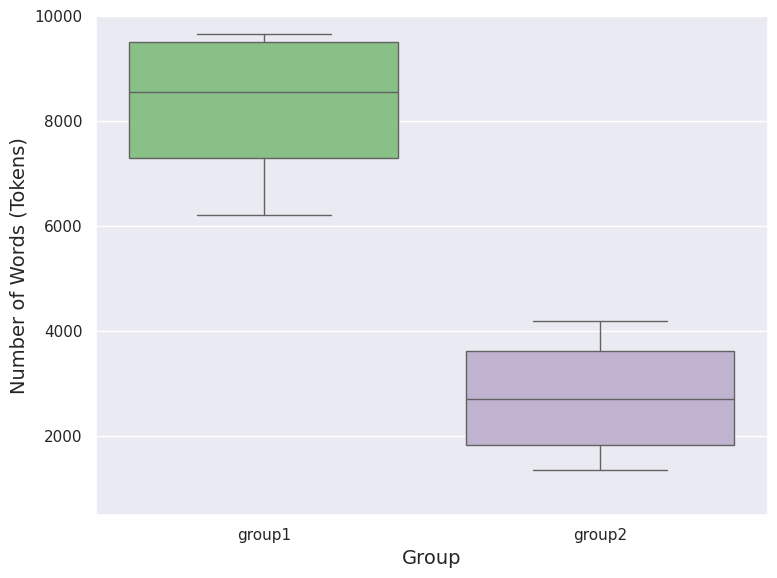

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#🍎🍎🍎🍎🍎 'Group'
# Normalize category labels (critical step)
df1['Group'] = df1['Group'].str.strip().str.lower()

# Check the unique values (optional debug)
print(df1['Group'].value_counts())

# Set theme and size
sns.set_theme(style='white')
sns.set(rc={'figure.figsize':(8,6),"font.size":14,"axes.titlesize":18,"axes.labelsize":14})

# Prepare the data
dd = df1[['Group', 'N_Splits']].copy()

# Draw the boxplot (1 box per category)
ax = sns.boxplot(x='Group', y='N_Splits', data=dd, palette="Accent")
ax.set_ylim([500, 10000]) #🍎🍎🍎🍎🍎 adjust second element(e.g.,1000) if necessary!
ax.set(xlabel='Group', ylabel='Number of Words (Tokens)')

# Save the figure
plt.tight_layout()
plt.savefig('boxplot_Nsplit.png')
plt.show()

# <font color = 'red'> 🐹🐾 **Final Script to prepare input text for further analysis (e.g., Lexical Diversity, Readability, Sentiment analysis, Semantic Similarity)**

  - # <font color = 'blue'> 🐹🐾 **Important & Useful!**
  - ### **This script will be based on plain text for 8 volumes above.**

## 🎃 👻 <font color = 'green'> **Caution: The following code cells should all be run to examine readability, sentiment analysis, and semantic similarity.** ⤵️

In [ ]:
!git clone https://github.com/ms624atyale/NLP

Cloning into 'NLP'...
remote: Enumerating objects: 462, done.
remote: Counting objects: 100% (181/181), done.
remote: Compressing objects: 100% (114/114), done.
remote: Total 462 (delta 137), reused 67 (delta 67), pack-reused 281 (from 1)
Receiving objects: 100% (462/462), 10.91 MiB | 9.40 MiB/s, done.
Resolving deltas: 100% (245/245), done.


In [ ]:
%cd /content/NLP/Wikipedia

/content/NLP/Wikipedia


In [ ]:
file_path= '/content/NLP/Wikipedia/wiki_group1_group2.csv'
df = pd.read_csv(file_path)
df

,Text,Title,Group
0,The 2024 Nobel Prize in Literature was awarded...,2024 Nobel Prize in Literature,Group2
1,Han Kang Korean: 한강; born 27 November 1970 is ...,Han Kang,Group2
2,Bong Joon Ho Korean: 봉준호; pronounced [poːŋ tɕu...,Bong Joon Ho,Group2
3,Pachinko Japanese: パチンコ; pronounced [patɕiŋko]...,Pachinko,Group2
4,K-pop K-pop Korean: RR: Keipap; an abbreviatio...,KPop,Group1
5,"The Korean Wave, or hallyu Korean; , refers to...",Korean Wave,Group1
6,KPop Demon Hunters is a 2025 American animated...,KPop Demon Hunters,Group1
7,BTS Korean: 방탄소년단; RR: Bangtan Sonyeondan; lit...,BTS,Group1


## 🐣 **Added column with String length information**

In [ ]:
length = []

for i in range(0, len(df['Text'])):
  LEN = len(df['Text'][i])
  length.append(LEN)

df['Data size'] = length
df

,Text,Title,Group,Data size
0,The 2024 Nobel Prize in Literature was awarded...,2024 Nobel Prize in Literature,Group2,8041
1,Han Kang Korean: 한강; born 27 November 1970 is ...,Han Kang,Group2,12067
2,Bong Joon Ho Korean: 봉준호; pronounced [poːŋ tɕu...,Bong Joon Ho,Group2,25492
3,Pachinko Japanese: パチンコ; pronounced [patɕiŋko]...,Pachinko,Group2,20699
4,K-pop K-pop Korean: RR: Keipap; an abbreviatio...,KPop,Group1,59079
5,"The Korean Wave, or hallyu Korean; , refers to...",Korean Wave,Group1,40377
6,KPop Demon Hunters is a 2025 American animated...,KPop Demon Hunters,Group1,46750
7,BTS Korean: 방탄소년단; RR: Bangtan Sonyeondan; lit...,BTS,Group1,58185


In [ ]:
# Added column:  Splitted words, Length of splitted words
tsplit = []
splen = []

for i in range(0, len(df['Text'])):
  TSP = df['Text'][i].split()
  SPLEN = len(TSP)
  tsplit.append(TSP)
  splen.append(SPLEN)
  # print(TSP)

df['Splits'] = tsplit
df['N_Splits'] = splen
df

,Text,Title,Group,Data size,Splits,N_Splits
0,The 2024 Nobel Prize in Literature was awarded...,2024 Nobel Prize in Literature,Group2,8041,"[The, 2024, Nobel, Prize, in, Literature, was,...",1357
1,Han Kang Korean: 한강; born 27 November 1970 is ...,Han Kang,Group2,12067,"[Han, Kang, Korean:, 한강;, born, 27, November, ...",1989
2,Bong Joon Ho Korean: 봉준호; pronounced [poːŋ tɕu...,Bong Joon Ho,Group2,25492,"[Bong, Joon, Ho, Korean:, 봉준호;, pronounced, [p...",4201
3,Pachinko Japanese: パチンコ; pronounced [patɕiŋko]...,Pachinko,Group2,20699,"[Pachinko, Japanese:, パチンコ;, pronounced, [patɕ...",3434
4,K-pop K-pop Korean: RR: Keipap; an abbreviatio...,KPop,Group1,59079,"[K-pop, K-pop, Korean:, RR:, Keipap;, an, abbr...",9447
5,"The Korean Wave, or hallyu Korean; , refers to...",Korean Wave,Group1,40377,"[The, Korean, Wave,, or, hallyu, Korean;, ,, r...",6213
6,KPop Demon Hunters is a 2025 American animated...,KPop Demon Hunters,Group1,46750,"[KPop, Demon, Hunters, is, a, 2025, American, ...",7647
7,BTS Korean: 방탄소년단; RR: Bangtan Sonyeondan; lit...,BTS,Group1,58185,"[BTS, Korean:, 방탄소년단;, RR:, Bangtan, Sonyeonda...",9648


In [ ]:
df.describe()

,Data size,N_Splits
count,8.000000,8.00000
mean,33836.250000,5492.00000
std,20075.263448,3237.05126
min,8041.000000,1357.00000
25%,18541.000000,3072.75000
50%,32934.500000,5207.00000
75%,49608.750000,8097.00000
max,59079.000000,9648.00000


# **Lexical Diversity Indices (10 types)**

**Getting LD indices**

In [ ]:
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

In [ ]:
# Added column: String length
lem = []

for i in range(0, len(df['Text'])):
  LEM = ld.flemmatize(df['Text'][i])
  print(LEM)
  lem.append(LEM)

df['Lemma'] = lem

['the', '2024', 'nobel', 'prize', 'in', 'literature', 'be', 'award', 'to', 'the', 'south', 'korean', 'author', 'han', 'kang', 'born', '1970', 'for', 'her', 'intense', 'poetic', 'prose', 'that', 'confront', 'historical', 'trauma', 'and', 'expose', 'the', 'fragility', 'of', 'human', 'life', 'it', 'be', 'announce', 'by', 'the', 'swedish', 'academy', 'in', 'stockholm', 'sweden', 'on', '10', 'october', '2024', 'and', 'be', 'award', 'on', '10', 'december', '2024', 'she', 'be', 'the', 'first', 'south', 'korean', 'and', 'first', 'asian', 'woman', 'to', 'win', 'the', 'nobel', 'prize', 'in', 'literature', 'making', 'her', 'the', '18th', 'woman', 'to', 'win', 'the', 'nobel', 'prize', 'in', 'that', 'category', 'laureate', 'han', 'kang', 'grow', 'up', 'with', 'a', 'literary', 'background', 'in', 'seoul', 'her', 'father', 'han', 'seungwon', 'being', 'a', 'reputed', 'novelist', 'alongside', 'her', 'passion', 'for', 'writing', 'she', 'spend', 'time', 'explore', 'art', 'and', 'music', 'which', 'be', 'r

# <font color = 'blue'> **⏰ It takes more than 1 minute to run the following code cell! Be patient before it finishes!** ⤵️

In [ ]:
# ADD LD indices

#1. Create empty lists.
TTR = []
RTTR = []
LogTTR = []
MassTTR = []
MSTTR = []
MATTR = []
HDD = []
MTLD = []
MTLD_wrap = []
MTLD_bid = []

# 2. Getting LD index values for each cell:

for i in range(0, len(df['Lemma'])):
  flt = df['Lemma'][i]
  ttr = ld.ttr(flt)
  rttr = ld.root_ttr(flt)
  logttr = ld.log_ttr(flt)
  mass = ld.maas_ttr(flt)
  msttr = ld.msttr(flt)
  mattr = ld.mattr(flt)
  hdd = ld.hdd(flt)
  mtld = ld.mtld(flt)
  mtld_wrap = ld.mtld_ma_wrap(flt)
  mtld_bid = ld.mtld_ma_bid(flt)

  # Add values to each list
  TTR.append(ttr)
  RTTR.append(rttr)
  LogTTR.append(logttr)
  MassTTR.append(mass)
  MSTTR.append(msttr)
  MATTR.append(mattr)
  HDD.append(hdd)
  MTLD.append(mtld)
  MTLD_wrap.append(mtld_wrap)
  MTLD_bid.append(mtld_bid)

# Add columns
df['TTR'] = TTR
df['RTTR'] = RTTR
df['LogTTR'] = LogTTR
df['MassTTR'] = MassTTR
df['MSTTR'] = MSTTR
df['MATTR'] = MATTR
df['HDD'] = HDD
df['MTLD'] = MTLD
df['MTLD_wrap'] = MTLD_wrap
df['MTLD_bid'] = MTLD_bid

In [ ]:
!pip install textstat
import textstat

In [ ]:
df['N_Sents'] = df['Text'].apply(textstat.sentence_count)
df.to_csv('LD_result_with_Nsents.csv')

In [ ]:
df.describe()

,Data size,N_Splits,TTR,RTTR,LogTTR,MassTTR,MSTTR,MATTR,HDD,MTLD,MTLD_wrap,MTLD_bid,N_Sents
count,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,33836.250000,5492.00000,0.281626,18.801509,0.847909,0.041690,0.788861,0.788546,0.850903,78.660424,80.727636,80.408552,237.750000
std,20075.263448,3237.05126,0.059445,3.311978,0.013046,0.002210,0.011235,0.013344,0.010371,7.190164,6.677198,6.938221,138.243832
min,8041.000000,1357.00000,0.205163,14.022982,0.827349,0.039280,0.768205,0.762082,0.836229,66.875466,72.858723,71.026732,60.000000
25%,18541.000000,3072.75000,0.244832,15.816962,0.839768,0.039355,0.785556,0.784020,0.843259,74.989654,76.657977,76.107742,138.750000
50%,32934.500000,5207.00000,0.263386,19.585137,0.845543,0.042072,0.787842,0.790580,0.851659,78.444897,78.371684,78.859540,222.000000
75%,49608.750000,8097.00000,0.315695,20.700094,0.858479,0.042874,0.798130,0.798125,0.858825,85.178411,87.611528,86.764441,311.750000
max,59079.000000,9648.00000,0.381093,23.224885,0.866213,0.045341,0.801447,0.803026,0.863615,86.593220,89.256459,89.355739,432.000000


##📈 **Plotting**

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

Group
group2    4
group1    4
Name: count, dtype: int64


/tmp/ipython-input-3487339562.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Group', y='N_Splits', data=dt, palette="Accent")


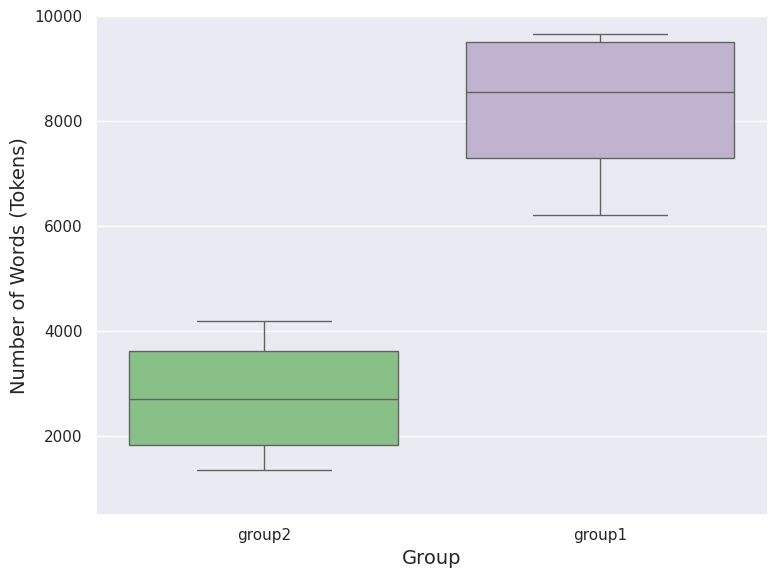

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

#🍎🍎🍎🍎🍎 'Group'
# Normalize category labels (critical step)
df['Group'] = df['Group'].str.strip().str.lower()

# Check the unique values (optional debug)
print(df['Group'].value_counts())

# Set theme and size
sns.set_theme(style='white')
sns.set(rc={'figure.figsize':(8,6),"font.size":14,"axes.titlesize":18,"axes.labelsize":14})

# Prepare the data
dt = df[['Group', 'N_Splits']].copy()

# Draw the boxplot (1 box per category)
ax = sns.boxplot(x='Group', y='N_Splits', data=dt, palette="Accent")
ax.set_ylim([500, 10000])
ax.set(xlabel='Group', ylabel='Number of Words (Tokens)')

# Save the figure
plt.tight_layout()
plt.savefig('boxplot_Nsplit.png')
plt.show()

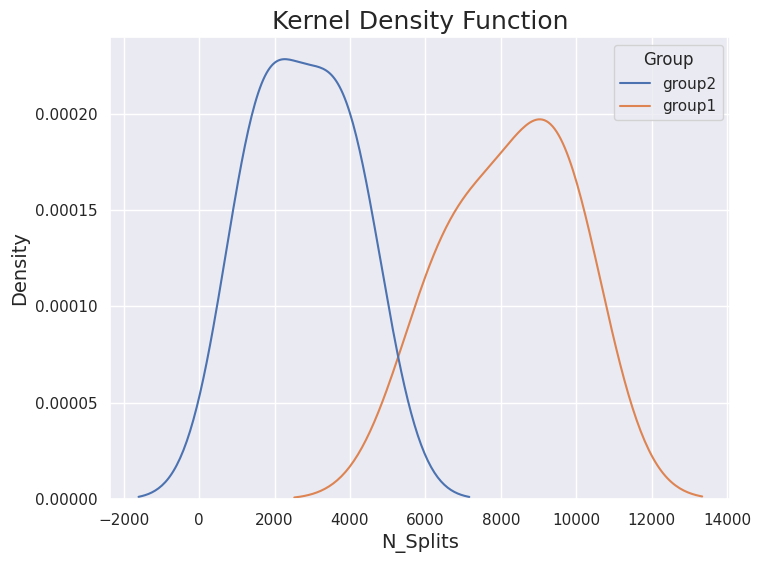

In [ ]:
sns.kdeplot(x='N_Splits', data=df, hue='Group', common_norm=False);
plt.title("Kernel Density Function")
plt.savefig('Density_Nsplit.png')

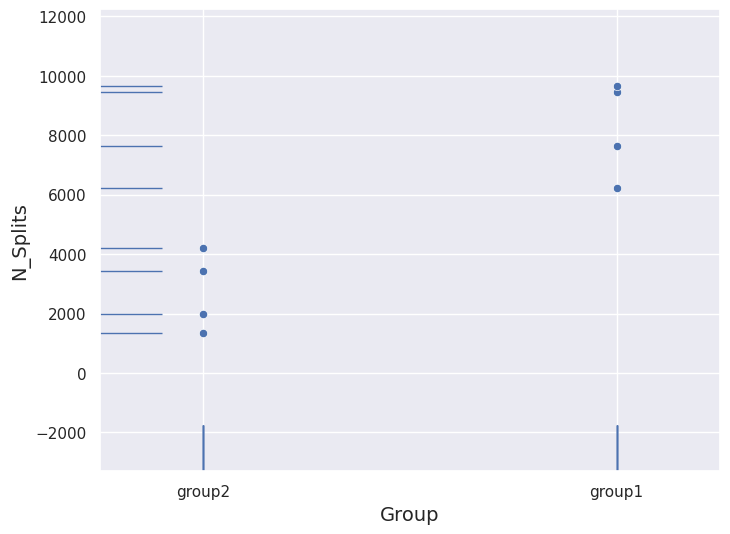

In [ ]:
sns.scatterplot(data=df, x="Group", y="N_Splits")
sns.rugplot(data=df, x="Group", y="N_Splits", height=.1)
plt.savefig('Rug_Nsplit.png')

### **Lexical Diversity analysis: select TTR, MassTTR, MTLD, HDD**

In [ ]:
df1 = df
for col in df1.columns:
    print(col)

Text
Title
Group
Data size
Splits
N_Splits
Lemma
TTR
RTTR
LogTTR
MassTTR
MSTTR
MATTR
HDD
MTLD
MTLD_wrap
MTLD_bid
N_Sents


In [ ]:
df1 = df[['Group','N_Splits','N_Sents','TTR','MATTR','HDD','MTLD']]
df1.head(15)

,Group,N_Splits,N_Sents,TTR,MATTR,HDD,MTLD
0,group2,1357,60,0.381093,0.794115,0.849626,80.228772
1,group2,1989,120,0.349925,0.762082,0.863615,66.875466
2,group2,4201,177,0.304286,0.787044,0.844667,76.112308
3,group2,3434,145,0.271112,0.779149,0.836229,71.621691
4,group1,9447,432,0.238988,0.799708,0.862893,86.593220
5,group1,6213,267,0.246780,0.785643,0.839037,76.661023
6,group1,7647,273,0.255659,0.803026,0.853692,86.429543
7,group1,9648,428,0.205163,0.797597,0.857469,84.761367


In [ ]:
df1.groupby('Group')['TTR'].describe()

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
group1,4.0,0.236647,0.022067,0.205163,0.230531,0.242884,0.249000,0.255659
group2,4.0,0.326604,0.048615,0.271112,0.295992,0.327105,0.357717,0.381093


In [ ]:
print(df1.groupby('Group')['TTR'].describe())

        count      mean       std       min       25%       50%       75%  \
Group                                                                       
group1    4.0  0.236647  0.022067  0.205163  0.230531  0.242884  0.249000   
group2    4.0  0.326604  0.048615  0.271112  0.295992  0.327105  0.357717   

             max  
Group             
group1  0.255659  
group2  0.381093  


##**MATTR (Moving average token-to-token ratio)**

In [ ]:
df1.groupby('Group')['MATTR'].describe()

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
group1,4.0,0.796494,0.007571,0.785643,0.794609,0.798653,0.800538,0.803026
group2,4.0,0.780598,0.013774,0.762082,0.774883,0.783097,0.788812,0.794115


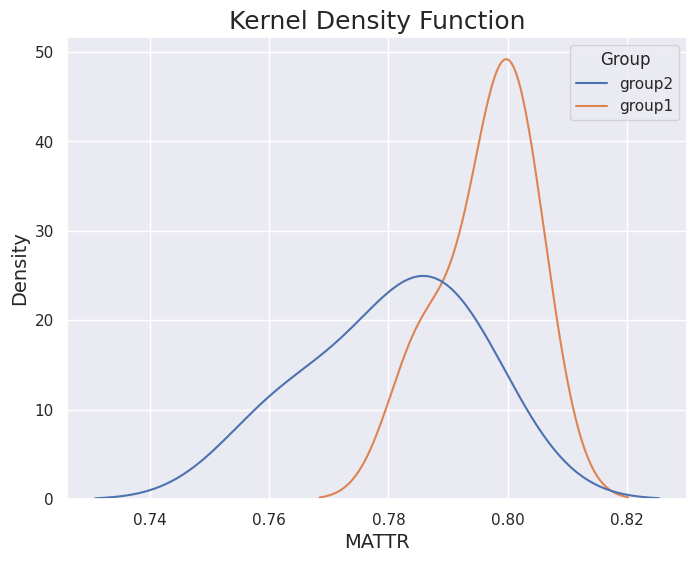

In [ ]:
sns.kdeplot(x='MATTR', data=df1, hue='Group', common_norm=False);
plt.title("Kernel Density Function")
plt.savefig('Density_MATTR.png')

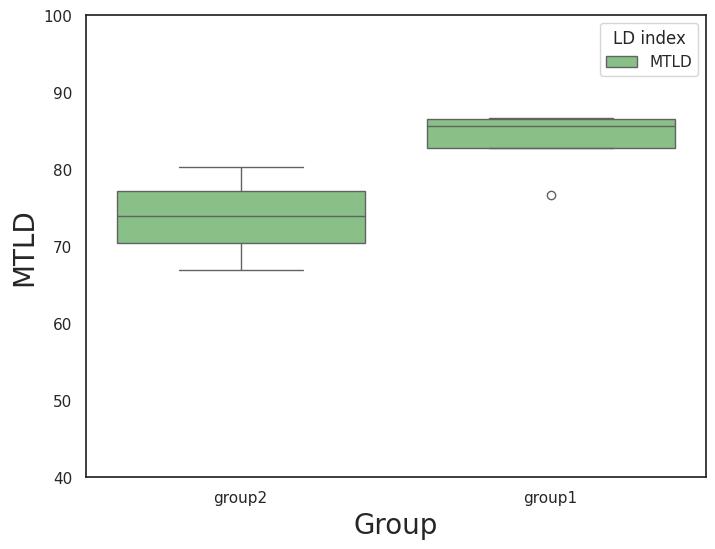

In [ ]:
sns.set(rc={'figure.figsize':(8,6),"font.size":20,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
# sns.set_theme(style='white')
dd=pd.melt(df1,id_vars=['Group'],value_vars=['MTLD'],var_name='LD index')
ax = sns.boxplot(x='Group',y='value',data=dd,hue='LD index',palette="Accent")
ax.set_ylim([40,100])
ax.set(xlabel='Group', ylabel='MTLD')
plt.savefig('boxplot_MTLD_by_group.png')

# <font color = 'red'> **Part II: Readability, sentiment analysis, & semantic similarity**

## 🎃 👻 <font color = 'green'> **Caution: The preceding code cells should all be run to examine readability, sentiment analysis, and semantic similarity. <font color = 'red'> _Find above the pumpkin and the ghost!_** ⤵️

#📚 📚 **Readability**

###**Install packages**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
!pip install lexical-diversity
from lexical_diversity import lex_div as ld

!pip install textstat
import textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.6/176.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.6 MB/s eta 0:00:00


In [ ]:
from typing import TextIO
FRE = []
FKG = []
GF = []
ARI = []
CLI = []
LWF = []
DCRS = []
TS = []

for i in range(0, len(df['Text'])):
  text = df['Text'][i]
  fre = textstat.flesch_reading_ease(text)
  fkg = textstat.flesch_kincaid_grade(text)
  gf = textstat.gunning_fog(text)
  ari = textstat.automated_readability_index(text)
  cli = textstat.coleman_liau_index(text)
  lwf = textstat.linsear_write_formula(text)
  dcrs = textstat.dale_chall_readability_score(text)
  ts = textstat.text_standard(text)

  FRE.append(fre)
  FKG.append(fkg)
  GF.append(gf)
  ARI.append(ari)
  CLI.append(cli)
  LWF.append(lwf)
  DCRS.append(dcrs)
  TS.append(ts)


df1['FRE'] = FRE #Flesch Reading Ease
df1['FKG'] = FKG
df1['GF'] = GF
df1['ARI'] = ARI
df1['CLI'] = CLI
df1['LWF'] = LWF
df1['DCRS'] = DCRS
df1['TS'] = TS


/tmp/ipython-input-1101326293.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['FRE'] = FRE #Flesch Reading Ease
/tmp/ipython-input-1101326293.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['FKG'] = FKG
/tmp/ipython-input-1101326293.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

In [ ]:
df1.to_csv('results_wiki_group1_group2.csv')

In [ ]:
df1.head(15)

,Group,N_Splits,N_Sents,TTR,MATTR,HDD,MTLD,FRE,FKG,GF,ARI,CLI,LWF,DCRS,TS
0,group2,1357,60,0.381093,0.794115,0.849626,80.228772,49.344604,11.982935,14.757834,12.882700,10.491876,16.75,10.516708,10th and 11th grade
1,group2,1989,120,0.349925,0.762082,0.863615,66.875466,52.904881,9.912971,12.571362,10.336124,10.864476,14.00,12.263722,9th and 10th grade
2,group2,4201,177,0.304286,0.787044,0.844667,76.112308,47.230074,12.562369,15.307953,14.220345,11.368501,17.00,11.479247,10th and 11th grade
3,group2,3434,145,0.271112,0.779149,0.836229,71.621691,47.990603,12.443920,14.361359,13.951034,11.178199,14.80,10.852771,13th and 14th grade
4,group1,9447,432,0.238988,0.799708,0.862893,86.593220,42.922889,12.698180,15.510886,14.138491,12.279936,14.60,11.609807,14th and 15th grade
5,group1,6213,267,0.246780,0.785643,0.839037,76.661023,30.682372,14.758724,18.462814,15.973800,13.882982,18.75,12.488278,13th and 14th grade
6,group1,7647,273,0.255659,0.803026,0.853692,86.429543,41.744175,14.390104,16.933073,16.585074,11.842612,15.25,11.811087,14th and 15th grade
7,group1,9648,428,0.205163,0.797597,0.857469,84.761367,51.473431,11.667123,13.986912,13.433185,10.996364,13.00,11.300310,12th and 13th grade


In [ ]:
df2 = df1
df2 = df2[['Group','N_Splits','N_Sents','TTR','MTLD','FRE','FKG','GF']]

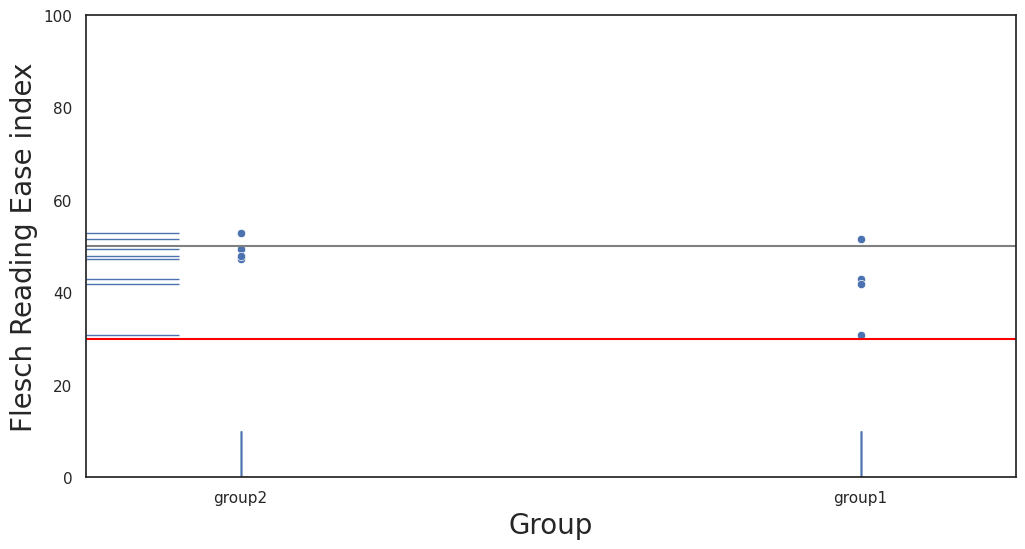

In [ ]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df2, x="Group", y="FRE")
ax = sns.rugplot(data=df2, x="Group", y="FRE", height=.1)
ax.set_ylim([0,100])
# ax.set_xlim([2014,2023])
ax.set(xlabel='Group', ylabel='Flesch Reading Ease index')
ax.axhline(50, color="gray")
ax.axhline(30, color="red")
# ax.axhline(60)
# ax.axhline(70)
# ax.axhline(80)
# plt.text(8, 50, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.savefig('Rug_FRE_bycategory.png')

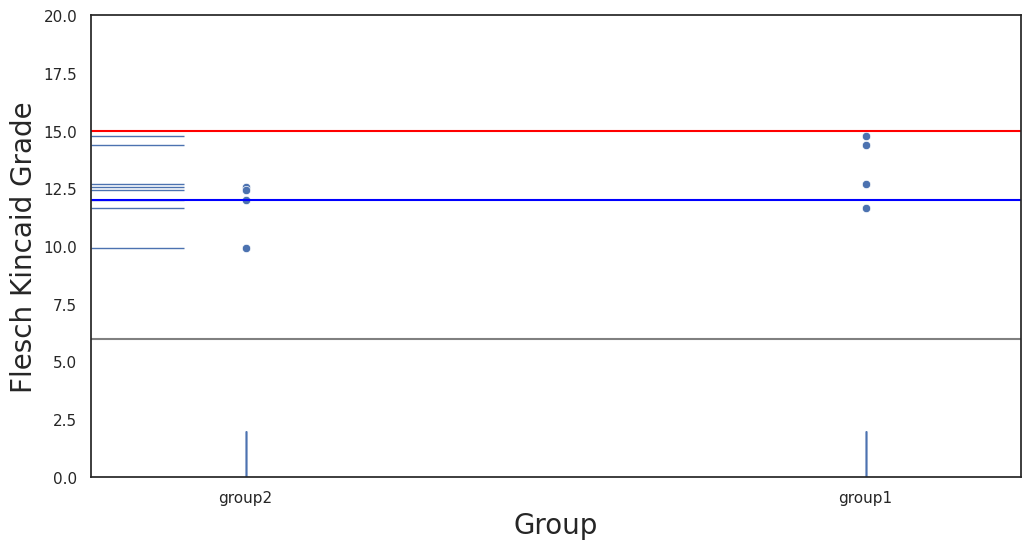

In [ ]:
sns.set(rc={'figure.figsize':(12,6),"font.size":40,"axes.titlesize":20,"axes.labelsize":20},style="white") # font size doesn't work
sns.scatterplot(data=df2, x="Group", y="FKG")
ax = sns.rugplot(data=df2, x="Group", y="FKG", height=.1)
ax.set_ylim([0,20])
# ax.set_xlim([2014,2023])
ax.set(xlabel='Group', ylabel='Flesch Kincaid Grade')
ax.axhline(15, color="red")
ax.axhline(12, color="blue")
ax.axhline(6, color="gray")
# ax.axhline(60)
# ax.axhline(70)
# ax.axhline(80)
# plt.text(8, 50, "An annotation", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.savefig('Rug_FKG_byGroup.png')

# <font color = 'red'> **Sentiment Analysis for Group1 (related to K-music)**

## **Bar Graph & Pie Chart for average across books in Family Narrative**

In [ ]:
import pandas as pd

# ▶️ Change this to your txt file name 🍎🍎🍎🍎🍎
txt_file = "/content/NLP/Wikipedia/wiki_corpus_delimited_group1_CLEANED_Edit.txt"

# Read the text file
with open(txt_file, "r", encoding="utf-8") as f:
    text = f.read()

# Create a DataFrame
df = pd.DataFrame({"Text": [text]})

# Save as CSV (same name but .csv extension)
csv_file = txt_file.replace(".txt", ".csv")
df.to_csv(csv_file, index=False, encoding="utf-8")

print(f"Created CSV file: {csv_file}")

Created CSV file: /content/NLP/Wikipedia/wiki_corpus_delimited_group1_CLEANED_Edit.csv


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             Sentence  CompScore  PosFlag  \
0   texttitlegroup\nkpop kpop korean rr keipap an ...     0.6808        1   
1   the music genre that the term is used to refer...     0.0000        0   
2   today kpop commonly refers to the musical outp...     0.0000        0   
3   as a pop genre kpop is characterized by its me...     0.0000        0   
4   kpop can trace its origins to rap dance a fusi...     0.4404        1   
5   their popularity with teenagers incentivized t...     0.8625        1   
6   and ses which marked the first generation of kpop     0.0000        0   
7   by the early 2000s tvxq and boa achieved succe...     0.7430        1   
8   as a component of the korean wave the internat...     0.4767        1   
9   in 2019 south korea ranked sixth among the top...     0.5267        1   
10  2020 was a recordbreaking year for south korea...     0.3818        1   
11  despite heavy influence from american pop musi...    -0.1027        0   

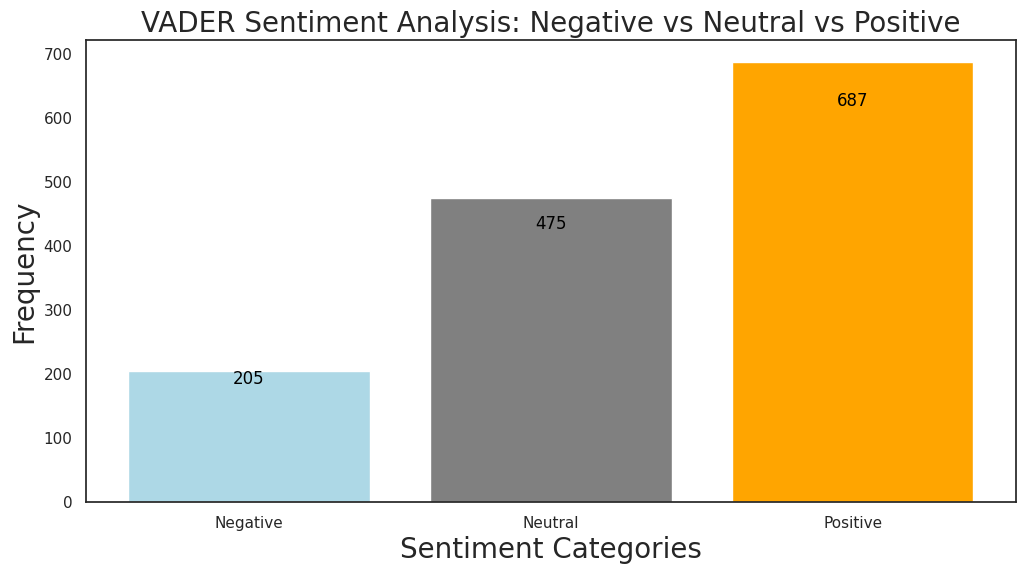

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------
# 1. Import libraries and download NLTK data
# ----------------------------------------------------------------------------------------------------------------------
import pandas as pd
import nltk
import string
import numpy as np
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

from nltk import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# ----------------------------------------------------------------------------------------------------------------------
# 2. Define the missing function: remove_punctuations()
# ----------------------------------------------------------------------------------------------------------------------
def remove_punctuations(text):
    if isinstance(text, str):
        return text.translate(str.maketrans("", "", string.punctuation))
    return text


# ----------------------------------------------------------------------------------------------------------------------
# 3. Load CSV file
# ----------------------------------------------------------------------------------------------------------------------
df = pd.read_csv('/content/NLP/Wikipedia/wiki_corpus_delimited_group1_CLEANED_Edit.csv')


# ----------------------------------------------------------------------------------------------------------------------
# 4. Sentence tokenization → DataFrame
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment = df['Text'].apply(sent_tokenize).explode().reset_index(drop=True)


# ----------------------------------------------------------------------------------------------------------------------
# 5. Clean punctuation + lowercase
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment = dfsentiment.apply(remove_punctuations).str.lower()


# ----------------------------------------------------------------------------------------------------------------------
# 6. Initialize VADER
# ----------------------------------------------------------------------------------------------------------------------
sid = SentimentIntensityAnalyzer()


# ----------------------------------------------------------------------------------------------------------------------
# 7. Define function to calculate compound score
# ----------------------------------------------------------------------------------------------------------------------
def calculate_compound_score(sentence):
    sentiment_scores = sid.polarity_scores(sentence)
    return sentiment_scores['compound']


# ----------------------------------------------------------------------------------------------------------------------
# 8. Calculate sentiment scores
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment = dfsentiment.to_frame(name="Sentence")
dfsentiment['CompScore'] = dfsentiment['Sentence'].apply(calculate_compound_score)


# ----------------------------------------------------------------------------------------------------------------------
# 9. Add sentiment flags
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment['PosFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if x >= 0.05 else 0)
dfsentiment['NegFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if x <= -0.05 else 0)
dfsentiment['NeuFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if -0.05 < x < 0.05 else 0)


# ----------------------------------------------------------------------------------------------------------------------
# 10. Display output
# ----------------------------------------------------------------------------------------------------------------------
print(dfsentiment.head(20))


# ----------------------------------------------------------------------------------------------------------------------
# 11. Print frequency counts
# ----------------------------------------------------------------------------------------------------------------------
print('* Negative:', dfsentiment['NegFlag'].sum())
print('* Neutral :', dfsentiment['NeuFlag'].sum())
print('* Positive:', dfsentiment['PosFlag'].sum())
print("="*50)
print("Total sentences:", len(dfsentiment))


# ----------------------------------------------------------------------------------------------------------------------
# 12. Plot the graph
# ----------------------------------------------------------------------------------------------------------------------
Negative = int(dfsentiment['NegFlag'].sum())
Neutral = int(dfsentiment['NeuFlag'].sum())
Positive = int(dfsentiment['PosFlag'].sum())

freqs = [Negative, Neutral, Positive]
labels = ['Negative', 'Neutral', 'Positive']
x = np.arange(len(labels))

colors = ["lightblue", "gray", "orange"]

bars = plt.bar(x, freqs, color=colors)

plt.xticks(x, labels)
plt.xlabel("Sentiment Categories")
plt.ylabel("Frequency")
plt.title("VADER Sentiment Analysis: Negative vs Neutral vs Positive")

# Write numbers inside bars
for bar, freq in zip(bars, freqs):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()*0.9,
             str(freq), ha='center', fontsize=12, color='black')

plt.show()

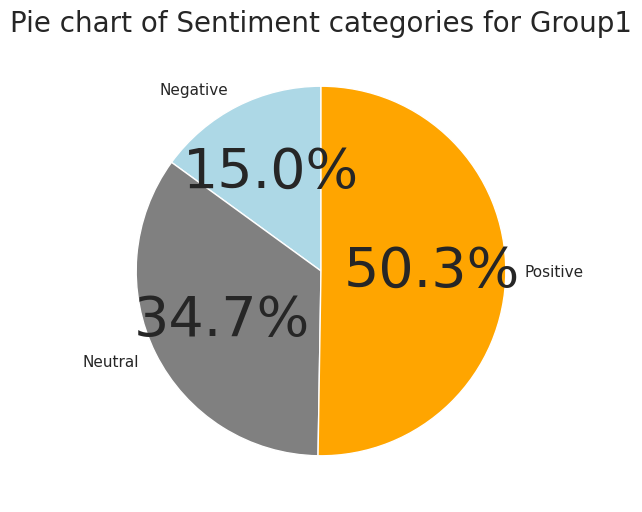

In [ ]:
# 감정분석 카테고리 파이차트 (비율확인용)
import numpy as np
import matplotlib.pyplot as plt

Negative = int(dfsentiment['NegFlag'].sum())
Neutral = int(dfsentiment['NeuFlag'].sum())
Positive = int(dfsentiment['PosFlag'].sum())

# Your three integer frequencies
freqs = [Negative, Neutral, Positive]

# Create labels for the segments
labels = ['Negative', 'Neutral', 'Positive']

# Specify the colors for each segment
colors = ['lightblue', 'gray', 'orange']

# Generate the pie chart with custom colors
plt.pie(freqs, labels=labels, colors=colors, autopct='%.1f%%', startangle=90)

# Set a title for the plot
plt.title('Pie chart of Sentiment categories for Group1')

# Display the plot
plt.show()

#<font color = 'red'> **Sentiment analysis for Group2 (related to more extensive K-culture)**

In [ ]:
import pandas as pd

# ▶️ Change this to your txt file name 🍎🍎🍎🍎🍎
txt_file = "/content/NLP/Wikipedia/wiki_corpus_delimited_group2_CLEANED_Edit.txt"

# Read the text file
with open(txt_file, "r", encoding="utf-8") as f:
    text = f.read()

# Create a DataFrame
df = pd.DataFrame({"Text": [text]})

# Save as CSV (same name but .csv extension)
csv_file = txt_file.replace(".txt", ".csv")
df.to_csv(csv_file, index=False, encoding="utf-8")

print(f"Created CSV file: {csv_file}")

Created CSV file: /content/NLP/Wikipedia/wiki_corpus_delimited_group2_CLEANED_Edit.csv


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             Sentence  CompScore  PosFlag  \
0   texttitlegroup\nthe 2024 nobel prize in litera...     0.1779        1   
1   it was announced by the swedish academy in sto...     0.4019        1   
2   she is the first south korean and first asian ...     0.9349        1   
3   laureate   han kang grew up with a literary ba...     0.0000        0   
4   alongside her passion for writing she spends t...     0.4588        1   
5   she started her career in 1993 with the public...     0.6369        1   
6   her major breakthrough came with the 2007 nove...    -0.5859        0   
7   her experimental and often disturbing stories ...    -0.8860        0   
8   her other wellknown works include human acts 소...     0.0000        0   
9   prize announcement   after the announcement an...    -0.2500        0   
10  annakarin palm was interviewed by carin klaess...     0.6728        1   
11  theres a continuity as to themes that is quite...     0.6593        1   

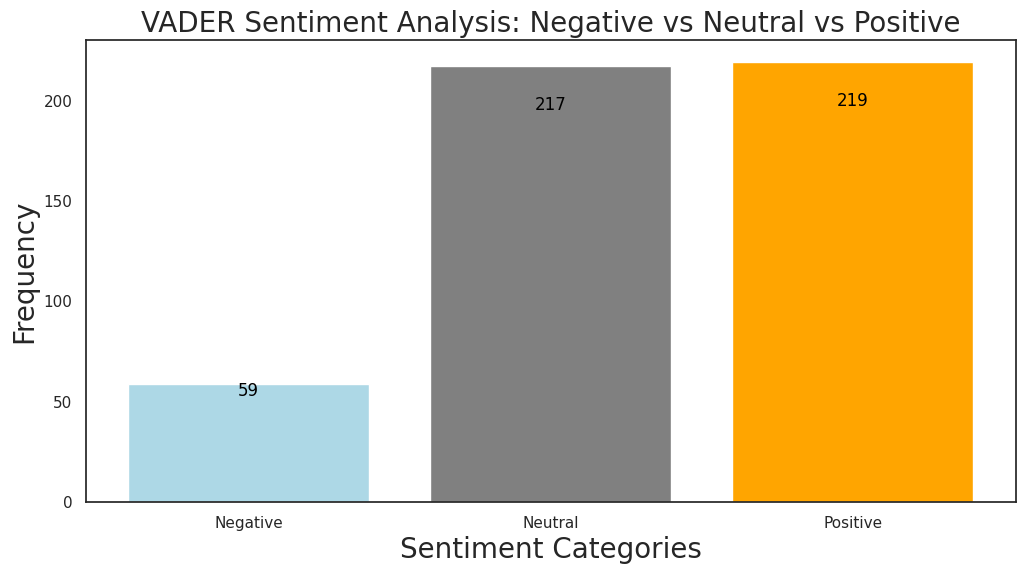

In [ ]:
# ----------------------------------------------------------------------------------------------------------------------
# 1. Import libraries and download NLTK data
# ----------------------------------------------------------------------------------------------------------------------
import pandas as pd
import nltk
import string
import numpy as np
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('vader_lexicon')

from nltk import sent_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer


# ----------------------------------------------------------------------------------------------------------------------
# 2. Define the missing function: remove_punctuations()
# ----------------------------------------------------------------------------------------------------------------------
def remove_punctuations(text):
    if isinstance(text, str):
        return text.translate(str.maketrans("", "", string.punctuation))
    return text


# ----------------------------------------------------------------------------------------------------------------------
# 3. Load CSV file
# ----------------------------------------------------------------------------------------------------------------------
df = pd.read_csv('/content/NLP/Wikipedia/wiki_corpus_delimited_group2_CLEANED_Edit.csv')


# ----------------------------------------------------------------------------------------------------------------------
# 4. Sentence tokenization → DataFrame
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment = df['Text'].apply(sent_tokenize).explode().reset_index(drop=True)


# ----------------------------------------------------------------------------------------------------------------------
# 5. Clean punctuation + lowercase
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment = dfsentiment.apply(remove_punctuations).str.lower()


# ----------------------------------------------------------------------------------------------------------------------
# 6. Initialize VADER
# ----------------------------------------------------------------------------------------------------------------------
sid = SentimentIntensityAnalyzer()


# ----------------------------------------------------------------------------------------------------------------------
# 7. Define function to calculate compound score
# ----------------------------------------------------------------------------------------------------------------------
def calculate_compound_score(sentence):
    sentiment_scores = sid.polarity_scores(sentence)
    return sentiment_scores['compound']


# ----------------------------------------------------------------------------------------------------------------------
# 8. Calculate sentiment scores
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment = dfsentiment.to_frame(name="Sentence")
dfsentiment['CompScore'] = dfsentiment['Sentence'].apply(calculate_compound_score)


# ----------------------------------------------------------------------------------------------------------------------
# 9. Add sentiment flags
# ----------------------------------------------------------------------------------------------------------------------
dfsentiment['PosFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if x >= 0.05 else 0)
dfsentiment['NegFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if x <= -0.05 else 0)
dfsentiment['NeuFlag'] = dfsentiment['CompScore'].apply(lambda x: 1 if -0.05 < x < 0.05 else 0)


# ----------------------------------------------------------------------------------------------------------------------
# 10. Display output
# ----------------------------------------------------------------------------------------------------------------------
print(dfsentiment.head(20))


# ----------------------------------------------------------------------------------------------------------------------
# 11. Print frequency counts
# ----------------------------------------------------------------------------------------------------------------------
print('* Negative:', dfsentiment['NegFlag'].sum())
print('* Neutral :', dfsentiment['NeuFlag'].sum())
print('* Positive:', dfsentiment['PosFlag'].sum())
print("="*50)
print("Total sentences:", len(dfsentiment))


# ----------------------------------------------------------------------------------------------------------------------
# 12. Plot the graph
# ----------------------------------------------------------------------------------------------------------------------
Negative = int(dfsentiment['NegFlag'].sum())
Neutral = int(dfsentiment['NeuFlag'].sum())
Positive = int(dfsentiment['PosFlag'].sum())

freqs = [Negative, Neutral, Positive]
labels = ['Negative', 'Neutral', 'Positive']
x = np.arange(len(labels))

colors = ["lightblue", "gray", "orange"]

bars = plt.bar(x, freqs, color=colors)

plt.xticks(x, labels)
plt.xlabel("Sentiment Categories")
plt.ylabel("Frequency")
plt.title("VADER Sentiment Analysis: Negative vs Neutral vs Positive")

# Write numbers inside bars
for bar, freq in zip(bars, freqs):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height()*0.9,
             str(freq), ha='center', fontsize=12, color='black')

plt.show()

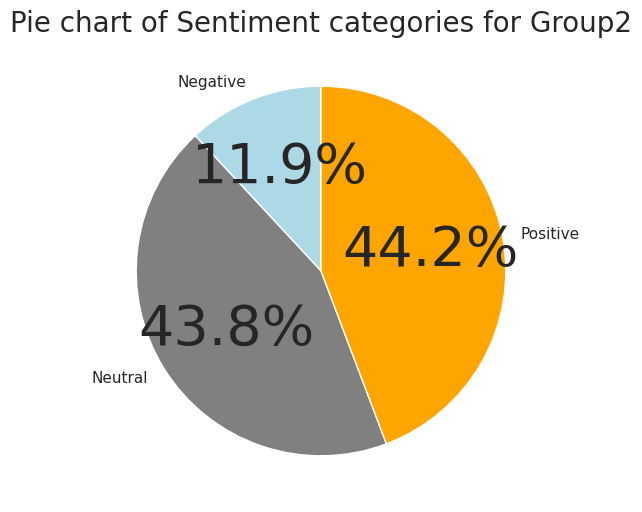

In [ ]:
# 감정분석 카테고리 파이차트 (비율확인용)
import numpy as np
import matplotlib.pyplot as plt

Negative = int(dfsentiment['NegFlag'].sum())
Neutral = int(dfsentiment['NeuFlag'].sum())
Positive = int(dfsentiment['PosFlag'].sum())

# Your three integer frequencies
freqs = [Negative, Neutral, Positive]

# Create labels for the segments
labels = ['Negative', 'Neutral', 'Positive']

# Specify the colors for each segment
colors = ['lightblue', 'gray', 'orange']

# Generate the pie chart with custom colors
plt.pie(freqs, labels=labels, colors=colors, autopct='%.1f%%', startangle=90)

# Set a title for the plot
plt.title('Pie chart of Sentiment categories for Group2')

# Display the plot
plt.show()

#**Semantic similarity for group1 (related to K-music)**

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 52.4 MB/s eta 0:00:00


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


✅ Generating Adaptive Semantic Network...
✅ Network graph saved to: /content/NLP/Wikipedia/Adaptive Semantic Similarity Network (Word-Level for Group1)


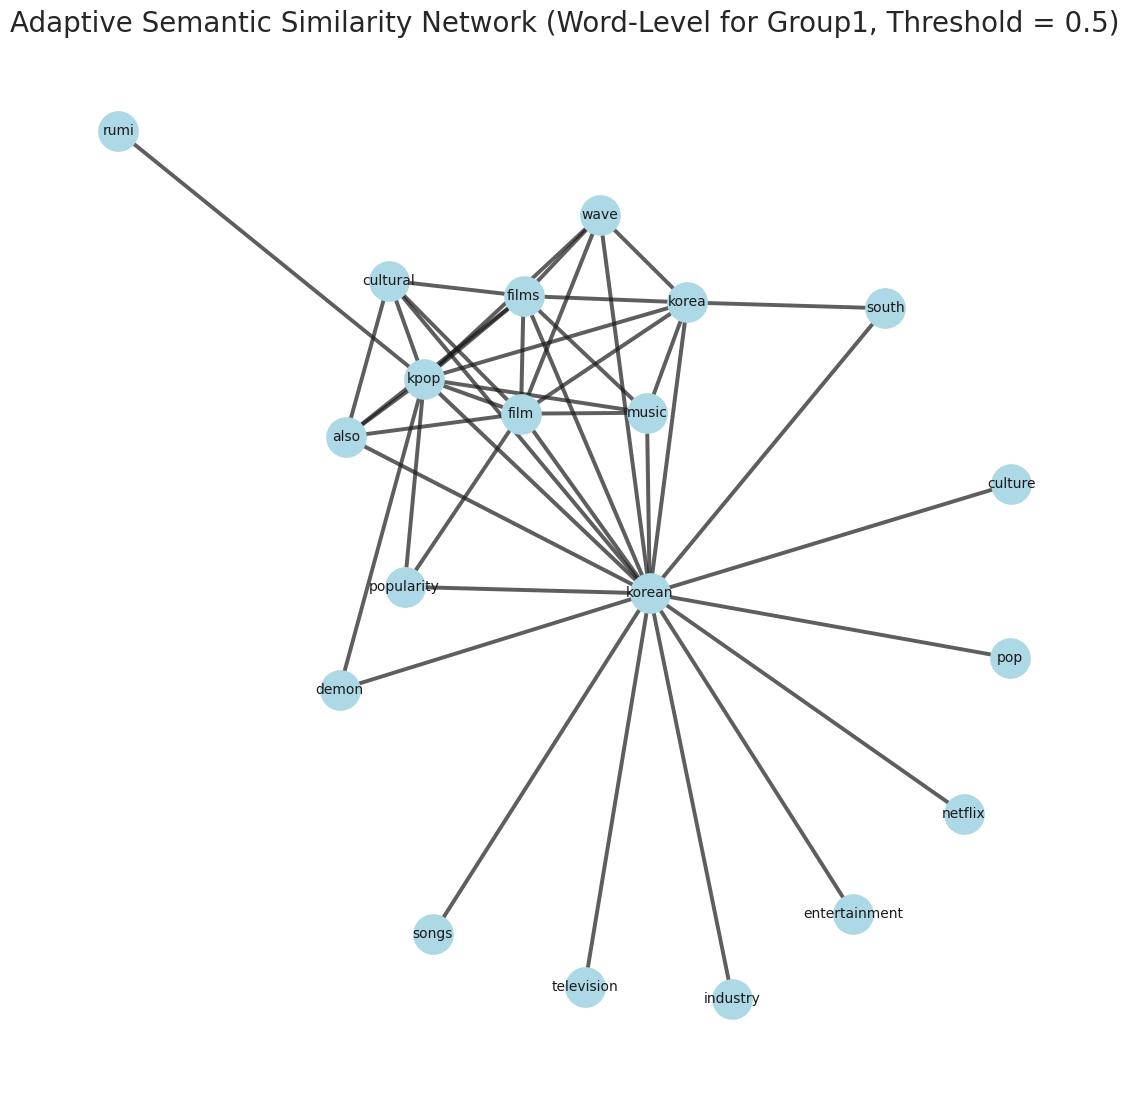

✅ Generating PCA Plot...
✅ PCA plot saved to: /content/NLP/Wikipedia/PCA of Word Embeddings for Group1.png


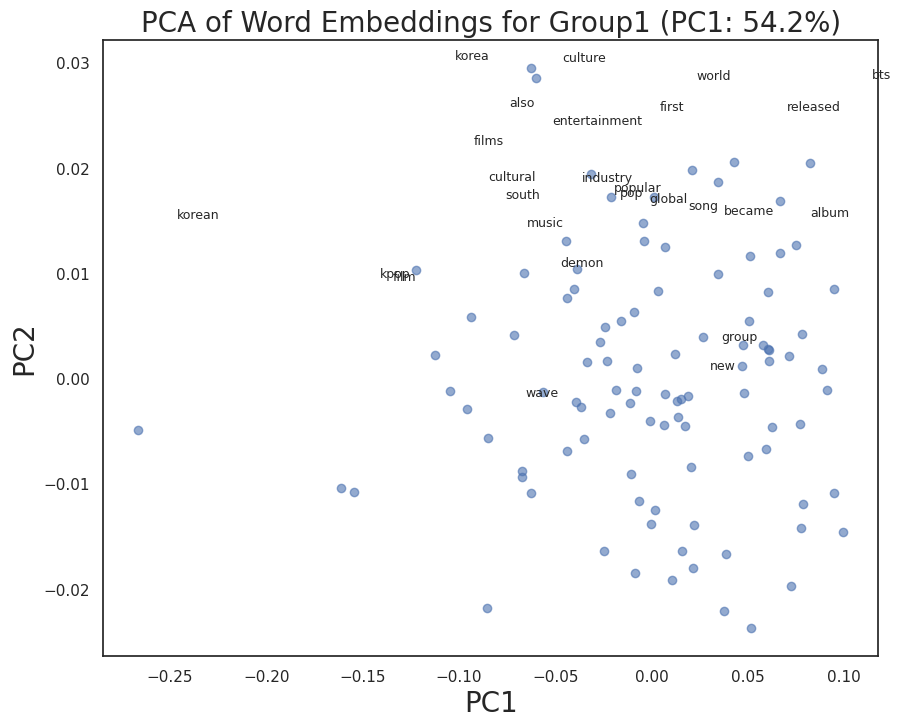

✅ Generating t-SNE Plot...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


✅ t-SNE plot saved to: /content/NLP/Wikipedia/t-SNE of Word Embeddings for Group1.png


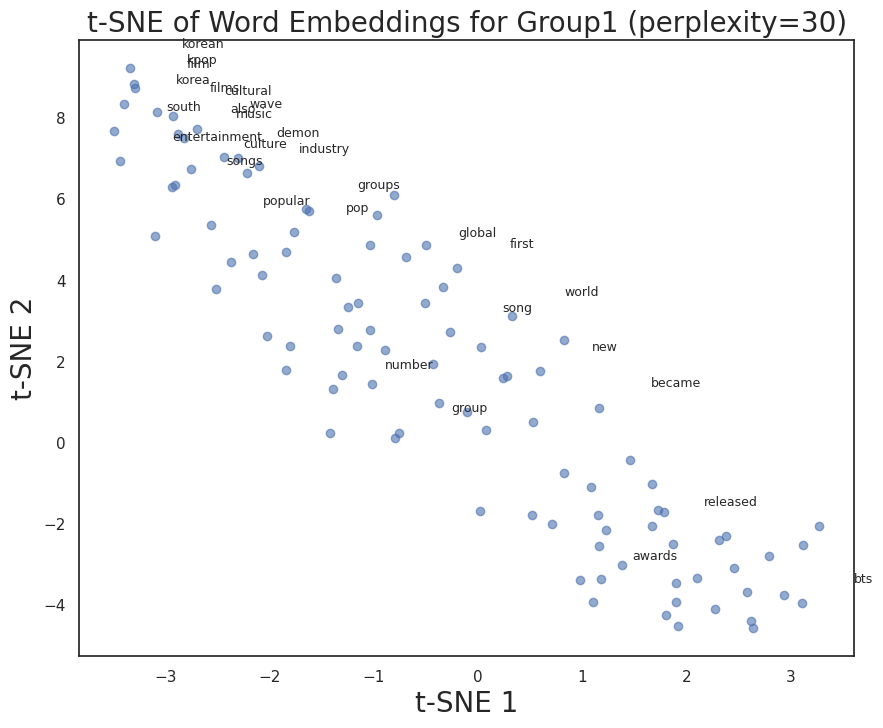

In [ ]:
# !pip install gensim nltk scikit-learn matplotlib pandas networkx
!pip install gensim
!pip install nltk

# Standard POS tagger
nltk.download("averaged_perceptron_tagger")

# Newer English-only POS tagger required in some NLTK versions
nltk.download("averaged_perceptron_tagger_eng")

import os
import pandas as pd
import nltk
import string
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# --- Utility ---
def get_wordnet_pos(tag):
    if tag.startswith('J'): return wordnet.ADJ
    elif tag.startswith('V'): return wordnet.VERB
    elif tag.startswith('N'): return wordnet.NOUN
    elif tag.startswith('R'): return wordnet.ADV
    else: return None

def load_texts(file_path, text_column='text'):
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip().str.lower()
    col = text_column.lower()
    texts = df[col].dropna().astype(str).tolist()
    return texts

def preprocess(texts):
    stop_words = set(stopwords.words('english'))
    sentences = []
    for text in texts:
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = nltk.word_tokenize(text.lower())
        pos_tags = pos_tag(tokens)
        filtered = [w for w, p in pos_tags if w.isalpha() and w not in stop_words and get_wordnet_pos(p)]
        if filtered:
            sentences.append(filtered)
    return sentences

# --- Train Word2Vec ---
def train_w2v(sentences, vector_size=100):
    return Word2Vec(sentences, vector_size=vector_size, window=5, min_count=2, workers=4, seed=42)

# --- Adaptive semantic network ---
def adaptive_network(model, save_dir, max_edges=60):
    words = list(model.wv.index_to_key)
    pairs = []
    for w in words[:200]:
        for sw, sim in model.wv.most_similar(w, topn=5):
            pairs.append((w, sw, sim))
    pairs = sorted(pairs, key=lambda x: x[2], reverse=True)
    pairs = pairs[:max_edges]

    G = nx.Graph()
    for a, b, s in pairs:
        G.add_edge(a, b, weight=s)

    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, k=0.5, iterations=80, seed=42)
    weights = [d['weight'] for (u, v, d) in G.edges(data=True)]
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800)
    nx.draw_networkx_edges(G, pos, width=[3*w for w in weights], alpha=0.7)
    nx.draw_networkx_labels(G, pos, font_size=10)
    plt.title("Adaptive Semantic Similarity Network (Word-Level for Group1, Threshold = 0.5)")
    plt.axis('off')
    plt.tight_layout()

    # Save the figure
    save_path = os.path.join(save_dir, "Adaptive Semantic Similarity Network (Word-Level for Group1)")
    plt.savefig(save_path, dpi=300)
    print(f"✅ Network graph saved to: {save_path}")
    plt.show()

# --- PCA Visualization ---
def plot_pca(model, save_dir, top_n=100, label_n=30):
    words = list(model.wv.index_to_key)[:top_n]
    X = np.array([model.wv[w] for w in words])
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(10,8))
    plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
    for i, w in enumerate(words[:label_n]):
        plt.annotate(w, (X_pca[i,0]+0.02, X_pca[i,1]+0.02), fontsize=9)
    plt.title(f"PCA of Word Embeddings for Group1 (PC1: {pca.explained_variance_ratio_[0]*100:.1f}%)")
    plt.xlabel("PC1"); plt.ylabel("PC2")

    # Save the figure
    save_path = os.path.join(save_dir, "PCA of Word Embeddings for Group1.png")
    plt.savefig(save_path, dpi=300)
    print(f"✅ PCA plot saved to: {save_path}")
    plt.show()

# --- t-SNE Visualization ---
def plot_tsne(model, save_dir, top_n=100, label_n=30):
    words = list(model.wv.index_to_key)[:top_n]
    X = np.array([model.wv[w] for w in words])
    perp = min(30, (len(words) - 1) // 3)
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42, n_iter=1000)
    X_tsne = tsne.fit_transform(X)
    plt.figure(figsize=(10,8))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.6)
    for i, w in enumerate(words[:label_n]):
        plt.annotate(w, (X_tsne[i,0]+0.5, X_tsne[i,1]+0.5), fontsize=9)
    plt.title(f"t-SNE of Word Embeddings for Group1 (perplexity={perp})")
    plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")

    # Save the figure
    save_path = os.path.join(save_dir, "t-SNE of Word Embeddings for Group1.png")
    plt.savefig(save_path, dpi=300)
    print(f"✅ t-SNE plot saved to: {save_path}")
    plt.show()

# --- Main ---
def main():
    file_path = "/content/NLP/Wikipedia/wiki_corpus_delimited_group1_CLEANED_Edit.csv"
    text_column = "Text"
    save_dir = os.path.dirname(file_path)

    texts = load_texts(file_path, text_column)
    sentences = preprocess(texts)
    model = train_w2v(sentences)

    print("✅ Generating Adaptive Semantic Network...")
    adaptive_network(model, save_dir, max_edges=60)

    print("✅ Generating PCA Plot...")
    plot_pca(model, save_dir, top_n=100, label_n=30)

    print("✅ Generating t-SNE Plot...")
    plot_tsne(model, save_dir, top_n=100, label_n=30)

if __name__ == "__main__":
    main()

#**Semantic similarity for group2 (related to more extensive K-culture)**

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


✅ Generating Adaptive Semantic Network...
✅ Network graph saved to: /content/NLP/Wikipedia/Adaptive Semantic Similarity Network (Word-Level for Group2)


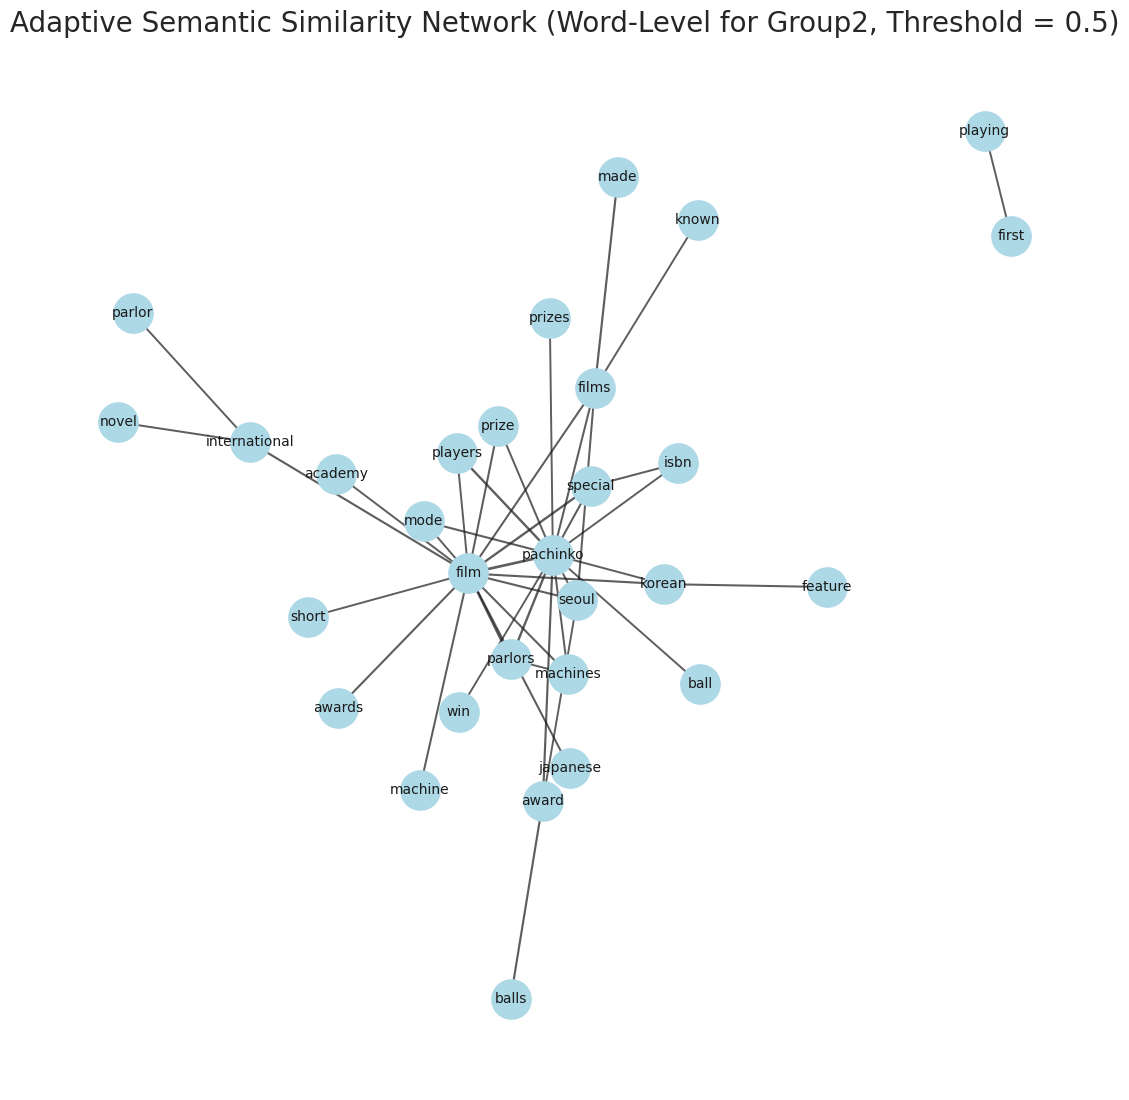

✅ Generating PCA Plot...
✅ PCA plot saved to: /content/NLP/Wikipedia/PCA of Word Embeddings for Group2.png


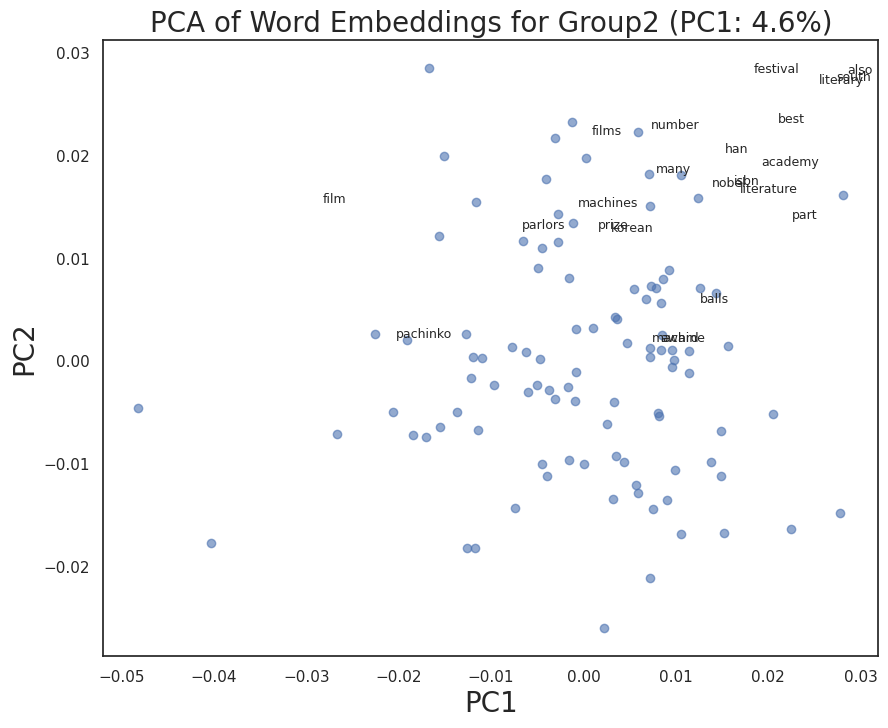

✅ Generating t-SNE Plot...


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


✅ t-SNE plot saved to: /content/NLP/Wikipedia/t-SNE of Word Embeddings for Group2.png


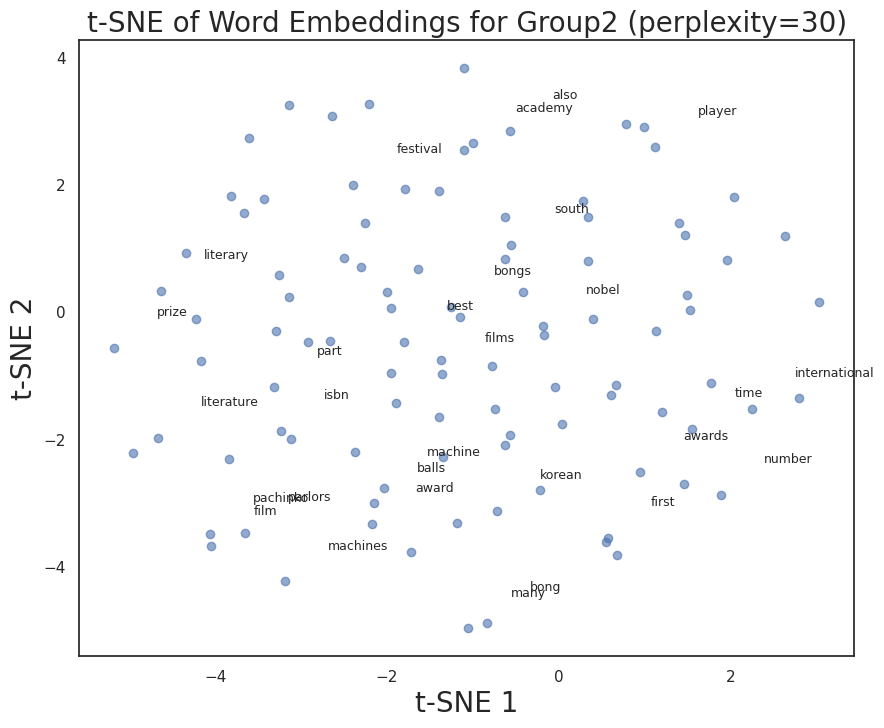

In [ ]:
# !pip install gensim nltk scikit-learn matplotlib pandas networkx
!pip install gensim
!pip install nltk

# Standard POS tagger
nltk.download("averaged_perceptron_tagger")

# Newer English-only POS tagger required in some NLTK versions
nltk.download("averaged_perceptron_tagger_eng")

import os
import pandas as pd
import nltk
import string
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, wordnet
from nltk import pos_tag

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# --- Utility ---
def get_wordnet_pos(tag):
    if tag.startswith('J'): return wordnet.ADJ
    elif tag.startswith('V'): return wordnet.VERB
    elif tag.startswith('N'): return wordnet.NOUN
    elif tag.startswith('R'): return wordnet.ADV
    else: return None

def load_texts(file_path, text_column='text'):
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip().str.lower()
    col = text_column.lower()
    texts = df[col].dropna().astype(str).tolist()
    return texts

def preprocess(texts):
    stop_words = set(stopwords.words('english'))
    sentences = []
    for text in texts:
        text = text.translate(str.maketrans('', '', string.punctuation))
        tokens = nltk.word_tokenize(text.lower())
        pos_tags = pos_tag(tokens)
        filtered = [w for w, p in pos_tags if w.isalpha() and w not in stop_words and get_wordnet_pos(p)]
        if filtered:
            sentences.append(filtered)
    return sentences

# --- Train Word2Vec ---
def train_w2v(sentences, vector_size=100):
    return Word2Vec(sentences, vector_size=vector_size, window=5, min_count=2, workers=4, seed=42)

# --- Adaptive semantic network ---
def adaptive_network(model, save_dir, max_edges=60):
    words = list(model.wv.index_to_key)
    pairs = []
    for w in words[:200]:
        for sw, sim in model.wv.most_similar(w, topn=5):
            pairs.append((w, sw, sim))
    pairs = sorted(pairs, key=lambda x: x[2], reverse=True)
    pairs = pairs[:max_edges]

    G = nx.Graph()
    for a, b, s in pairs:
        G.add_edge(a, b, weight=s)

    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(G, k=0.5, iterations=80, seed=42)
    weights = [d['weight'] for (u, v, d) in G.edges(data=True)]
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=800)
    nx.draw_networkx_edges(G, pos, width=[3*w for w in weights], alpha=0.7)
    nx.draw_networkx_labels(G, pos, font_size=10)
    plt.title("Adaptive Semantic Similarity Network (Word-Level for Group2, Threshold = 0.5)")
    plt.axis('off')
    plt.tight_layout()

    # Save the figure
    save_path = os.path.join(save_dir, "Adaptive Semantic Similarity Network (Word-Level for Group2)")
    plt.savefig(save_path, dpi=300)
    print(f"✅ Network graph saved to: {save_path}")
    plt.show()

# --- PCA Visualization ---
def plot_pca(model, save_dir, top_n=100, label_n=30):
    words = list(model.wv.index_to_key)[:top_n]
    X = np.array([model.wv[w] for w in words])
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    plt.figure(figsize=(10,8))
    plt.scatter(X_pca[:,0], X_pca[:,1], alpha=0.6)
    for i, w in enumerate(words[:label_n]):
        plt.annotate(w, (X_pca[i,0]+0.02, X_pca[i,1]+0.02), fontsize=9)
    plt.title(f"PCA of Word Embeddings for Group2 (PC1: {pca.explained_variance_ratio_[0]*100:.1f}%)")
    plt.xlabel("PC1"); plt.ylabel("PC2")

    # Save the figure
    save_path = os.path.join(save_dir, "PCA of Word Embeddings for Group2.png")
    plt.savefig(save_path, dpi=300)
    print(f"✅ PCA plot saved to: {save_path}")
    plt.show()

# --- t-SNE Visualization ---
def plot_tsne(model, save_dir, top_n=100, label_n=30):
    words = list(model.wv.index_to_key)[:top_n]
    X = np.array([model.wv[w] for w in words])
    perp = min(30, (len(words) - 1) // 3)
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42, n_iter=1000)
    X_tsne = tsne.fit_transform(X)
    plt.figure(figsize=(10,8))
    plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.6)
    for i, w in enumerate(words[:label_n]):
        plt.annotate(w, (X_tsne[i,0]+0.5, X_tsne[i,1]+0.5), fontsize=9)
    plt.title(f"t-SNE of Word Embeddings for Group2 (perplexity={perp})")
    plt.xlabel("t-SNE 1"); plt.ylabel("t-SNE 2")

    # Save the figure
    save_path = os.path.join(save_dir, "t-SNE of Word Embeddings for Group2.png")
    plt.savefig(save_path, dpi=300)
    print(f"✅ t-SNE plot saved to: {save_path}")
    plt.show()

# --- Main ---
def main():
    file_path = "/content/NLP/Wikipedia/wiki_corpus_delimited_group2_CLEANED_Edit.csv"
    text_column = "Text"
    save_dir = os.path.dirname(file_path)

    texts = load_texts(file_path, text_column)
    sentences = preprocess(texts)
    model = train_w2v(sentences)

    print("✅ Generating Adaptive Semantic Network...")
    adaptive_network(model, save_dir, max_edges=60)

    print("✅ Generating PCA Plot...")
    plot_pca(model, save_dir, top_n=100, label_n=30)

    print("✅ Generating t-SNE Plot...")
    plot_tsne(model, save_dir, top_n=100, label_n=30)

if __name__ == "__main__":
    main()